<a href="https://colab.research.google.com/github/cfretes/cfretes/blob/main/TP_2_v04_CF_XGB_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("#"*52)
print("              TP-2 Fretes Carlos A.")
print("✨ Que la fuerza (de procesamiento) te acompañe. ✨")
print("#"*52)

####################################################
              TP-2 Fretes Carlos A.
✨ Que la fuerza (de procesamiento) te acompañe. ✨
####################################################


In [ ]:
# Librerías estándar para manipulación de datos y cálculos
import pandas as pd
import numpy as np

# Librerías para visualización (EDA)
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías de Scikit-learn para preprocesamiento y modelado
from sklearn.model_selection import train_test_split

# librerias de modelos
import xgboost as xgb_model
from sklearn.ensemble import RandomForestClassifier

# Librerías para evaluación de modelos
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

Conectar con Google Drive







In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# --- Definición de Archivos (Trazabilidad) ---
#Carga de datasets

df = pd.read_csv ('/content/drive/MyDrive/Colab Notebooks/TP2/smoking_prediction.csv')
dfe = pd.read_csv ('/content/drive/MyDrive/Colab Notebooks/TP2/smoking_prediction_entrega.csv')

In [ ]:
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,3.38,0.04,0.04,0.04,0.04,...,0.51,0.04,0.00,0.75,0.79,1.13,Y,0,Y,0
1,1,F,40,160,60,3.38,0.01,0.00,0.04,0.04,...,0.50,0.04,0.00,0.92,0.79,0.75,Y,0,Y,0
2,2,M,55,170,60,3.33,0.01,0.01,0.04,0.04,...,0.63,0.04,0.04,0.88,0.67,0.92,Y,0,N,1
3,3,M,40,165,70,3.67,0.05,0.05,0.04,0.04,...,0.59,0.04,0.04,0.79,1.08,0.75,Y,0,Y,0
4,4,F,40,155,60,3.58,0.04,0.04,0.04,0.04,...,0.50,0.04,0.00,0.67,0.58,0.92,Y,0,N,0


In [ ]:
dfe.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar
0,27358,M,25,160,65,3.42,0.05,0.00,0.04,0.04,...,3.04,0.63,0.04,0.01,0.75,0.71,0.71,Y,0,Y
1,27364,M,30,180,80,3.46,0.04,0.01,0.04,0.04,...,4.21,0.59,0.04,0.04,0.79,1.13,1.33,Y,0,N
2,27368,M,55,165,60,3.42,0.00,0.01,0.04,0.04,...,2.04,0.63,0.04,0.01,1.08,1.29,2.00,Y,1,Y
3,27378,M,20,175,75,3.63,0.05,0.05,0.04,0.04,...,3.71,0.63,0.04,0.04,0.83,0.58,0.46,Y,0,N
4,27381,M,25,165,80,3.79,0.04,0.04,0.04,0.04,...,6.63,0.67,0.04,0.04,1.25,1.63,1.96,Y,1,Y


In [ ]:
df.info()
dfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   50000 non-null  int64  
 1   gender               50000 non-null  object 
 2   age                  50000 non-null  int64  
 3   height(cm)           50000 non-null  int64  
 4   weight(kg)           50000 non-null  int64  
 5   waist(cm)            50000 non-null  float64
 6   eyesight(left)       50000 non-null  float64
 7   eyesight(right)      50000 non-null  float64
 8   hearing(left)        50000 non-null  float64
 9   hearing(right)       50000 non-null  float64
 10  systolic             50000 non-null  float64
 11  relaxation           50000 non-null  float64
 12  fasting blood sugar  50000 non-null  float64
 13  Cholesterol          50000 non-null  float64
 14  triglyceride         50000 non-null  float64
 15  HDL                  50000 non-null 

In [ ]:
#Elimino variable "oral" por valor constante en ambos Dataframes
df = df.drop('oral', axis=1)
dfe = dfe.drop('oral', axis=1)

In [ ]:
# FUNCIÓN PARA CODIFICACIÓN ONE-HOT DE VARIABLES CATEGÓRICAS

def encode_categorical(dataframe, columns=['gender', 'tartar']):
    # Convierte variables categóricas en columnas binarias (0 y 1)
    # Por ejemplo: gender='M' y gender='F' se convierten en gender_M y gender_F
    # El parámetro dtype=int asegura que los valores sean enteros directamente
    return pd.get_dummies(dataframe, columns=columns, dtype=int)

# APLICACIÓN DE LA CODIFICACIÓN A LOS DATASETS


# Codifica las columnas 'gender' y 'tartar' del primer dataset (df)
# Resultado: gender_F, gender_M, tartar_Y, tartar_N con valores 0 o 1
encoded_df = encode_categorical(df)

# Codifica las mismas columnas del segundo dataset (dfe)
# Mantiene consistencia en la estructura de ambos datasets
encoded_dfe = encode_categorical(dfe)

# VERIFICACIÓN de la estructura

# información detallada del dataset codificado "df"
encoded_df.info()

# información detallada del dataset codificado "dfe"
encoded_dfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   50000 non-null  int64  
 1   age                  50000 non-null  int64  
 2   height(cm)           50000 non-null  int64  
 3   weight(kg)           50000 non-null  int64  
 4   waist(cm)            50000 non-null  float64
 5   eyesight(left)       50000 non-null  float64
 6   eyesight(right)      50000 non-null  float64
 7   hearing(left)        50000 non-null  float64
 8   hearing(right)       50000 non-null  float64
 9   systolic             50000 non-null  float64
 10  relaxation           50000 non-null  float64
 11  fasting blood sugar  50000 non-null  float64
 12  Cholesterol          50000 non-null  float64
 13  triglyceride         50000 non-null  float64
 14  HDL                  50000 non-null  float64
 15  LDL                  50000 non-null 

In [ ]:
encoded_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,50000.0,26284.994580,16015.070567,0.00,12499.75,24999.50,40034.25,55690.00
age,50000.0,44.189300,12.090086,20.00,40.00,40.00,55.00,85.00
height(cm),50000.0,164.652000,9.208778,130.00,160.00,165.00,170.00,190.00
weight(kg),50000.0,65.878700,12.831355,30.00,55.00,65.00,75.00,135.00
waist(cm),50000.0,3.415468,0.386760,2.13,3.17,3.42,3.67,5.38
eyesight(left),50000.0,0.027999,0.024137,0.00,0.01,0.04,0.04,0.38
eyesight(right),50000.0,0.027865,0.024297,0.00,0.01,0.04,0.04,0.38
hearing(left),50000.0,0.041026,0.006325,0.04,0.04,0.04,0.04,0.08
hearing(right),50000.0,0.041048,0.006389,0.04,0.04,0.04,0.04,0.08
systolic,50000.0,5.063196,0.570171,2.96,4.67,5.00,5.42,10.00


In [ ]:
# Distribucion de variable smoking
encoded_df.smoking.value_counts(normalize=True)

,proportion
smoking,
0,0.63342
1,0.36658


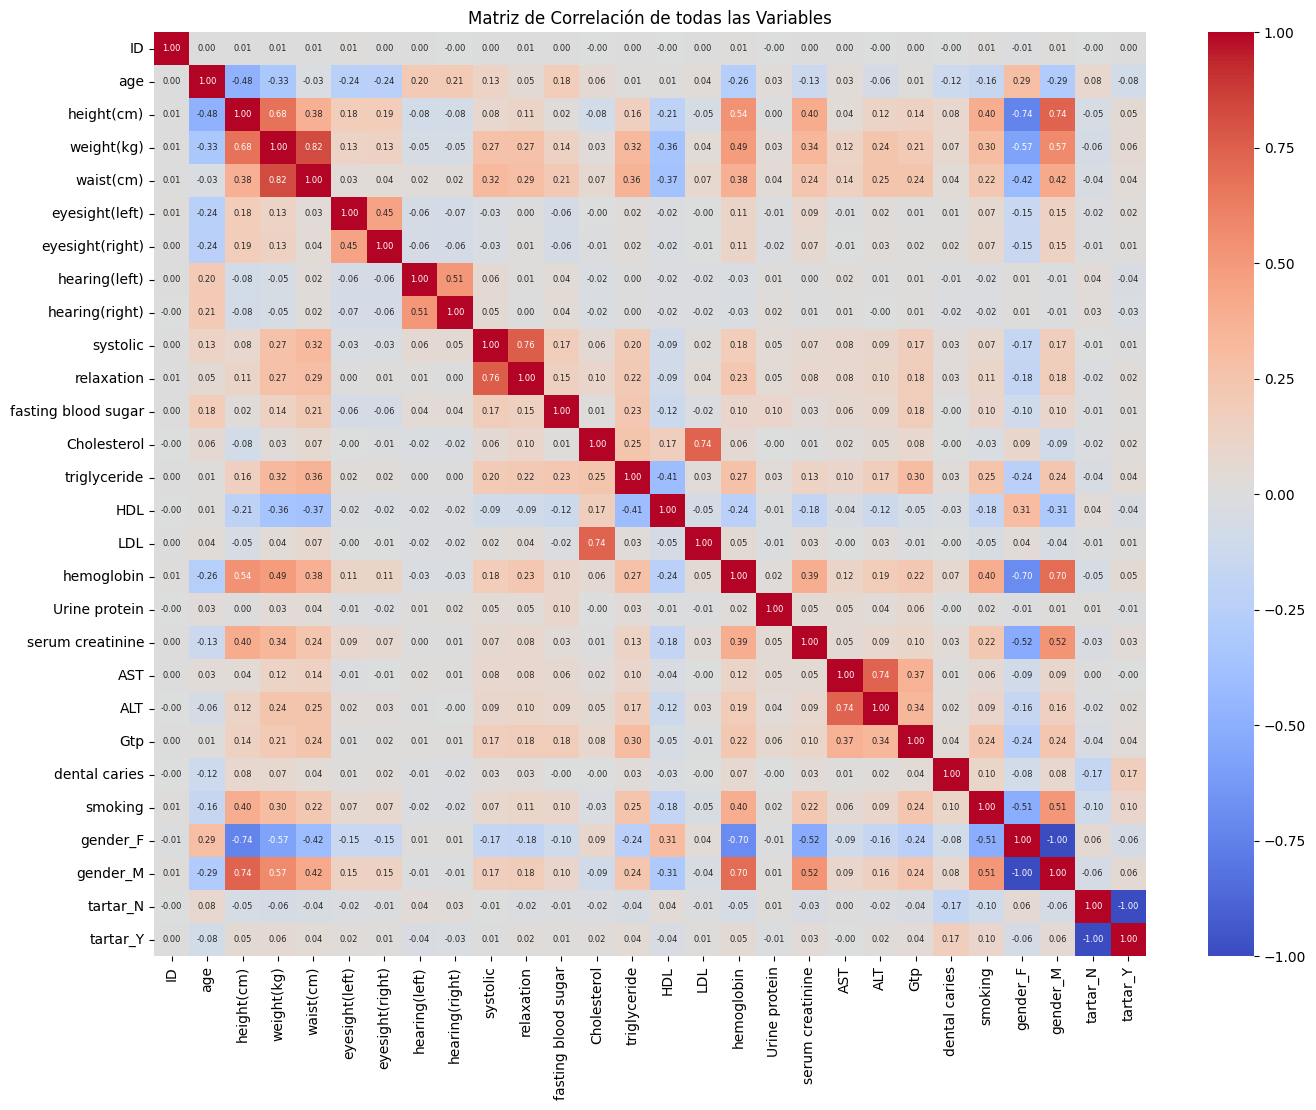

In [ ]:
# VISUALIZACIÓN DE LA MATRIZ DE CORRELACIÓN ---

# Nota: Se recomienda analizar solo las correlaciones con 'smoking' en modelos grandes.
# El heatmap de todas las columnas puede ser muy grande para visualizarlo bien.

plt.figure(figsize=(16,12)) # Aumentamos el tamaño para mejor visualización
# Calculamos la matriz de correlación en el DataFrame de entrenamiento (df)
sns.heatmap(encoded_df.corr(),
            annot=True, # Mostrar el valor de correlación
            fmt=".2f",  # Formato a dos decimales
            cmap='coolwarm', # Elegimos un mapa de color para diferenciar positivos/negativos
            annot_kws={"size": 6}) # Ajustamos el tamaño de la fuente para que quepa
plt.title('Matriz de Correlación de todas las Variables')
plt.show()

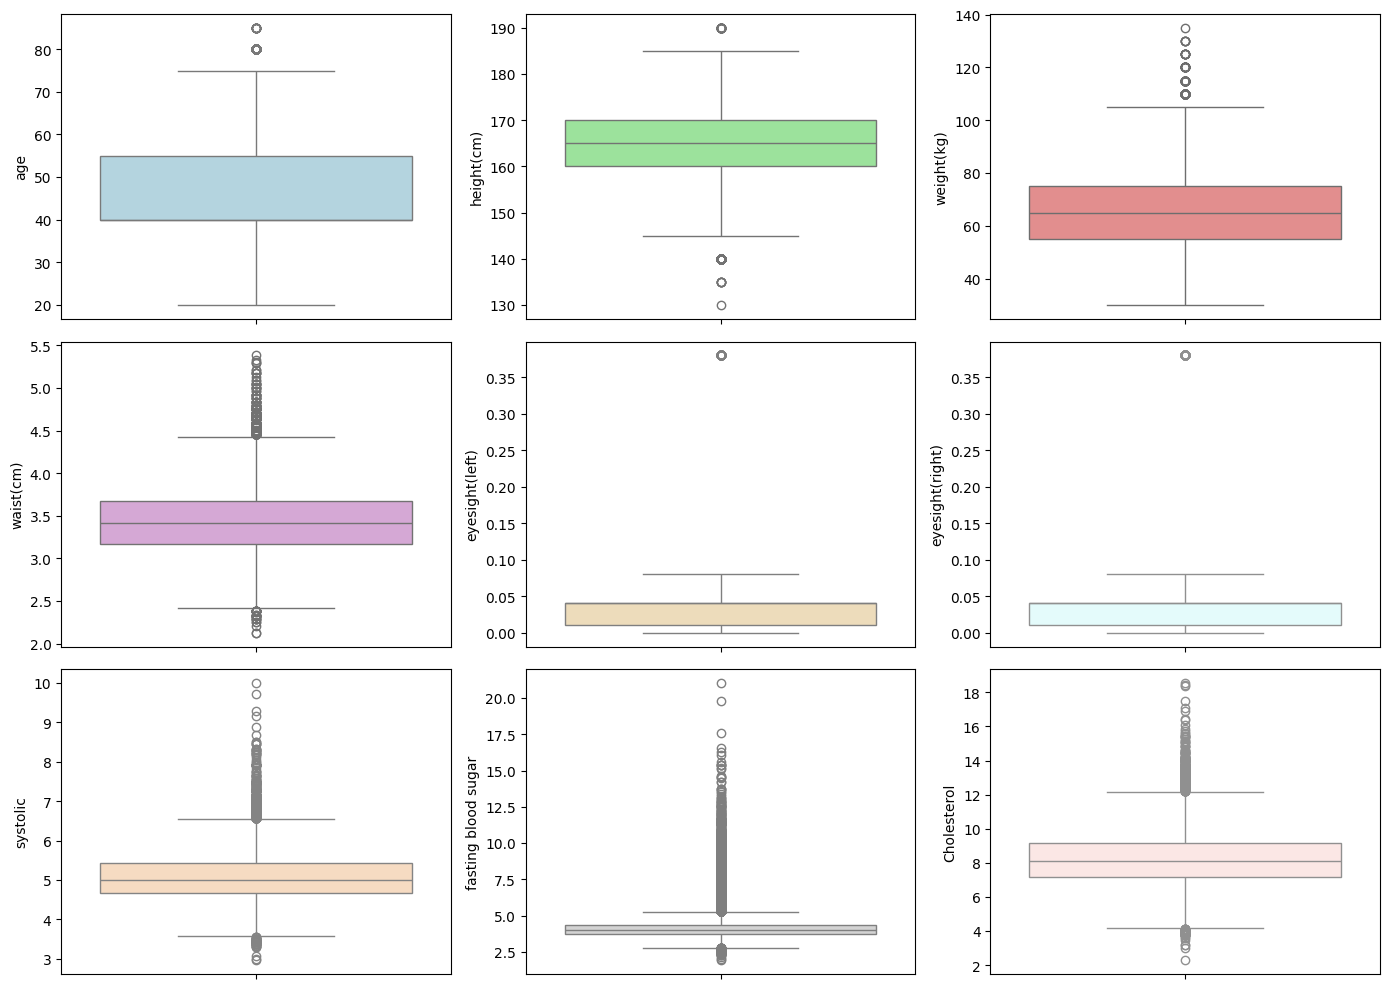

In [ ]:
#Hago boxplot para ver distribucion de variables importantes para ver outlayers
fig, axs = plt.subplots(3,3, figsize = (14,10))
plt1 = sns.boxplot(encoded_df['age'], ax = axs[0,0], color='lightblue')
plt2 = sns.boxplot(encoded_df['height(cm)'], ax = axs[0,1], color='lightgreen')
plt3 = sns.boxplot(encoded_df['weight(kg)'], ax = axs[0,2], color='lightcoral')
plt1 = sns.boxplot(encoded_df['waist(cm)'], ax = axs[1,0], color='plum')
plt2 = sns.boxplot(encoded_df['eyesight(left)'], ax = axs[1,1], color='wheat')
plt3 = sns.boxplot(encoded_df['eyesight(right)'], ax = axs[1,2], color='lightcyan')
plt1 = sns.boxplot(encoded_df['systolic'], ax = axs[2,0], color='peachpuff')
plt2 = sns.boxplot(encoded_df['fasting blood sugar'], ax = axs[2,1], color='lightgray')
plt3 = sns.boxplot(encoded_df['Cholesterol'], ax = axs[2,2], color='mistyrose')

plt.tight_layout()

In [ ]:
# Definición de datos de entrenamiento
# X: todas las variables predictoras (features)
# y: variable objetivo (smoking)
X = encoded_df.drop("smoking", axis=1).copy()
y = encoded_df.smoking.copy()

In [ ]:
# División Train/Test (80/20 con estratificación)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
y_train.value_counts(normalize=True)

,proportion
smoking,
0,0.633429
1,0.366571


In [ ]:
y_test.value_counts(normalize=True)

,proportion
smoking,
0,0.6334
1,0.3666


In [ ]:
#binary:logistic por ser clasificacion binaria
#n_estimators=500 cantidad máxima de árboles
#learning_rate=0.05 paso de aprendizaje, evita sobreajuste
#max_depth=3 profundidad baja para prevenir overfitting
#subsample=0.7 usa 70% de las filas por árbol, mejora generalización
#colsample_bytree=0.7 usa 70% de las columnas por árbol
#reg_lambda=1.5 regularización L2 para evitar sobreajuste
#scale_pos_weight=... corrige el desbalance entre clases
#early_stopping_rounds=50 frena el entrenamiento si no mejora
#eval_metric='logloss' métrica estable para clasificación binaria

scale_pos_weight_value = 22170 / 12830

model = xgb_model.XGBClassifier(
    objective='binary:logistic',
    n_estimators=500,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.7,
    colsample_bytree=0.7,
    reg_lambda=1.5,
    scale_pos_weight=scale_pos_weight_value,
    early_stopping_rounds=50,      # ← debe ir aquí
    eval_metric='logloss',         # ← también aquí
    random_state=42
)

model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],   # validación
    verbose=False
)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=50,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
# Prueba de modelos
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [ ]:
print("Train")
print(classification_report(y_train, train_pred))
print("----------------------------------------------------------")
print("Test")
print(classification_report(y_test, test_pred))

Train
              precision    recall  f1-score   support

           0       0.91      0.69      0.78     22170
           1       0.62      0.89      0.73     12830

    accuracy                           0.76     35000
   macro avg       0.77      0.79      0.76     35000
weighted avg       0.81      0.76      0.76     35000

----------------------------------------------------------
Test
              precision    recall  f1-score   support

           0       0.90      0.67      0.77      9501
           1       0.61      0.88      0.72      5499

    accuracy                           0.75     15000
   macro avg       0.76      0.77      0.74     15000
weighted avg       0.80      0.75      0.75     15000



In [ ]:
# ----- GENERAR PREDICCIONES PARA ENTREGA -----

# 1. Predecir con el modelo final sobre encoded_dfe
y_pred = model.predict(encoded_dfe)

# 2. Crear columna de predicción
pred_col = pd.Series(
    y_pred.ravel(),
    name='smoking_entrega_xgb',
    index=encoded_dfe.index
)

# 3. Concatenar features + predicción
resultados_xgb = pd.concat([encoded_dfe, pred_col], axis=1)

# 4. Mostrar primeras filas
resultados_xgb.head()


,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,serum creatinine,AST,ALT,Gtp,dental caries,gender_F,gender_M,tartar_N,tartar_Y,smoking_entrega_xgb
0,27358,25,160,65,3.42,0.05,0.00,0.04,0.04,5.04,...,0.01,0.75,0.71,0.71,0,0,1,0,1,0
1,27364,30,180,80,3.46,0.04,0.01,0.04,0.04,5.38,...,0.04,0.79,1.13,1.33,0,0,1,1,0,1
2,27368,55,165,60,3.42,0.00,0.01,0.04,0.04,5.25,...,0.01,1.08,1.29,2.00,1,0,1,0,1,1
3,27378,20,175,75,3.63,0.05,0.05,0.04,0.04,5.33,...,0.04,0.83,0.58,0.46,0,0,1,1,0,0
4,27381,25,165,80,3.79,0.04,0.04,0.04,0.04,4.50,...,0.04,1.25,1.63,1.96,1,0,1,0,1,1


In [ ]:
resultados_xgb.to_csv("/content/drive/MyDrive/Colab Notebooks/TP2/entrega_xgb.csv", index=False)

In [ ]:
#*******************RandomForest *************************

# Agrego hiperparametro class_weigth para balancear clases
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
#Entreno modelo RF
rf_model.fit(X_train, y_train)
#Aplico modelo RF
y_pred_rf = rf_model.predict(X_test)

#Genero Reporte

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy del modelo Random Forest: {accuracy_rf:.4f}")
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred_rf))

y_pred_rf_entrega = rf_model.predict(encoded_dfe)
#convierto en columna
pred_col_rf = pd.Series(y_pred_rf_entrega.ravel(), name='smoking_pred_rf', index=encoded_dfe.index)
#Concateno
resultados_rf = pd.concat([encoded_dfe, pred_col_rf], axis=1)
#Chequeo de dataframe final
resultados_rf.head()
#Verifico dist de resultados
resultados_rf.smoking_pred_rf.value_counts(normalize=True)
#Guardo en formato excel
resultados_rf.to_csv("/content/drive/MyDrive/Colab Notebooks/TP2/entrega_fr.csv", index=False)

Accuracy del modelo Random Forest: 0.7905
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      9501
           1       0.71      0.71      0.71      5499

    accuracy                           0.79     15000
   macro avg       0.77      0.77      0.77     15000
weighted avg       0.79      0.79      0.79     15000

